In [1]:
import os
import time, datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

` rsync -avu nexusgateway:/mnt/NexusData/Bridge/Temperature_20220419.txt ./`

In [2]:
date  = "20240305"

fname = "Temperature_" + date + ".txt"
fpath = "/data/SlowDataLogCopies"#"/home/nexus-admin/Downloads"
path  = os.path.join(fpath,fname)

In [3]:
## Extract the header column names
col_names = None
with open(path,"r") as f:
    col_names = f.readline().split()
print(col_names)

['Channel', 'Measurement', 'Resistance', 'Temperature', 'Res', 'Range', 'Excitation', 'Time', 'ControlSetup', 'ControlChannel', 'CurveName', 'HeaterRange', 'PID_P', 'PID_I', 'PID_D', 'SetupUnit', 'SetPoint', 'HeatResistance', 'HeaterPower']


In [4]:
## Create an empty dataframe with column names
df = pd.DataFrame(columns=col_names)

In [5]:
with open(path,"r") as f:
    ## Get all the lines in the files
    lines = f.readlines()
    
    ## Count the number of lines in the file 
    nline = len(lines)
    
    ## Loop over all rows in file, skipping the first
    for i in 1+np.arange(nline-1):
        
        ## Parse the line
        line = None
        line = np.array(lines[i].split("\t"))
        l1t  = np.append(line[0:4] , line[4].split())
        line = np.append( l1t, line[5:])
        line[3] = line[3].replace("K","")
        
        ## Make sure the line has the right number of entries
        if len(line) != len(col_names):
            line = np.append(line, np.empty((len(col_names)-len(line),1), dtype=str))
        
        ## Add row to end of DataFrame
        df.loc[len(df.index)] = line

In [8]:
def timeConvert(tstr):
    return time.mktime(datetime.datetime.strptime(tstr.strip(), "%Y-%m-%d %H:%M:%S.%f").timetuple())
    
df["Tstamp"] = df["Time"].apply(timeConvert)

In [9]:
df

,Channel,Measurement,Resistance,Temperature,Res,Range,Excitation,Time,ControlSetup,ControlChannel,CurveName,HeaterRange,PID_P,PID_I,PID_D,SetupUnit,SetPoint,HeatResistance,HeaterPower,Tstamp
0,4,NC,23034.8 Ohms,0.033976,63.2,kOhms,2.00 uV,2024-03-05 06:00:04.860\n,,,,,,,,,,,,1.709640e+09
1,5,DC Tower Therm,2803.94 Ohms,0.045293,6.32,kOhms,6.32 uV,2024-03-05 06:00:13.553\n,,,,,,,,,,,,1.709640e+09
2,4,NC,23578.8 Ohms,0.033026,63.2,kOhms,2.00 uV,2024-03-05 06:00:22.344\n,,,,,,,,,,,,1.709640e+09
3,5,DC Tower Therm,2813.08 Ohms,0.044565,6.32,kOhms,6.32 uV,2024-03-05 06:00:31.033\n,,,,,,,,,,,,1.709640e+09
4,4,NC,23213.5 Ohms,0.033664,63.2,kOhms,2.00 uV,2024-03-05 06:00:39.833\n,,,,,,,,,,,,1.709640e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8601,5,DC Tower Therm,2844.86 Ohms,0.042125,6.32,kOhms,6.32 uV,2024-03-06 03:17:18.207\n,,,,,,,,,,,,1.709717e+09
8602,4,NC,23419.7 Ohms,0.033304,63.2,kOhms,2.00 uV,2024-03-06 03:17:27.007\n,,,,,,,,,,,,1.709717e+09
8603,5,DC Tower Therm,2820.05 Ohms,0.044010,6.32,kOhms,6.32 uV,2024-03-06 03:17:35.707\n,,,,,,,,,,,,1.709717e+09
8604,4,NC,24393.7 Ohms,0.031603,63.2,kOhms,2.00 uV,2024-03-06 03:17:44.497\n,,,,,,,,,,,,1.709717e+09


In [10]:
set(df["Channel"])

{'4', '5'}

In [11]:
df[ df["Channel"] == "4" ]

,Channel,Measurement,Resistance,Temperature,Res,Range,Excitation,Time,ControlSetup,ControlChannel,CurveName,HeaterRange,PID_P,PID_I,PID_D,SetupUnit,SetPoint,HeatResistance,HeaterPower,Tstamp
0,4,NC,23034.8 Ohms,0.033976,63.2,kOhms,2.00 uV,2024-03-05 06:00:04.860\n,,,,,,,,,,,,1.709640e+09
2,4,NC,23578.8 Ohms,0.033026,63.2,kOhms,2.00 uV,2024-03-05 06:00:22.344\n,,,,,,,,,,,,1.709640e+09
4,4,NC,23213.5 Ohms,0.033664,63.2,kOhms,2.00 uV,2024-03-05 06:00:39.833\n,,,,,,,,,,,,1.709640e+09
6,4,NC,23697.5 Ohms,0.032819,63.2,kOhms,2.00 uV,2024-03-05 06:00:57.323\n,,,,,,,,,,,,1.709640e+09
8,4,NC,23037.7 Ohms,0.033971,63.2,kOhms,2.00 uV,2024-03-05 06:01:14.822\n,,,,,,,,,,,,1.709640e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8596,4,NC,24002.7 Ohms,0.032286,63.2,kOhms,2.00 uV,2024-03-06 03:16:34.527\n,,,,,,,,,,,,1.709717e+09
8598,4,NC,23598.2 Ohms,0.032992,63.2,kOhms,2.00 uV,2024-03-06 03:16:52.018\n,,,,,,,,,,,,1.709717e+09
8600,4,NC,22823.4 Ohms,0.034345,63.2,kOhms,2.00 uV,2024-03-06 03:17:09.507\n,,,,,,,,,,,,1.709717e+09
8602,4,NC,23419.7 Ohms,0.033304,63.2,kOhms,2.00 uV,2024-03-06 03:17:27.007\n,,,,,,,,,,,,1.709717e+09


In [12]:
def plotChannel(chan, fig_obj=None):
    
    ## Ensure we're looking at strings only
    if not (type(chan)==type("s")):
        chan = str(chan)
        
    ## Get the dataframe entries for this channel
    chan_df = df[ df["Channel"] == chan ]
    
    ## Get the data to plot
    t_vals = chan_df["Tstamp"].to_numpy().astype(type(1.1))      ## Epoch seconds
    T_vals = chan_df["Temperature"].to_numpy()                   ## Kelvin
    
    ## Clean and recast the data of interest
    T_vals[ T_vals == 'Out of Range' ] = np.nan
    T_vals    = 1000.0 * T_vals.astype(type(1.1))                ## milliKelvin
    t_vals_dt = np.vectorize(datetime.datetime.fromtimestamp)(t_vals-5*3600)
    
    ## Create the plot
    if fig_obj is None:
        fig = plt.figure()
    ax0 = fig_obj.gca()
    ax0.set_xlabel("Time")
    ax0.set_ylabel("Temperature [mK]")
    
    ## Draw the line
    ax0.plot(t_vals_dt,T_vals)
    
    ## Change the time format
    ax0.xaxis.set_major_formatter( DateFormatter('%H:%M:%S') )
    for tick in ax0.xaxis.get_majorticklabels():
        tick.set_horizontalalignment('right')
        tick.set_rotation(30)

    return fig_obj, ax0

<IPython.core.display.Javascript object>


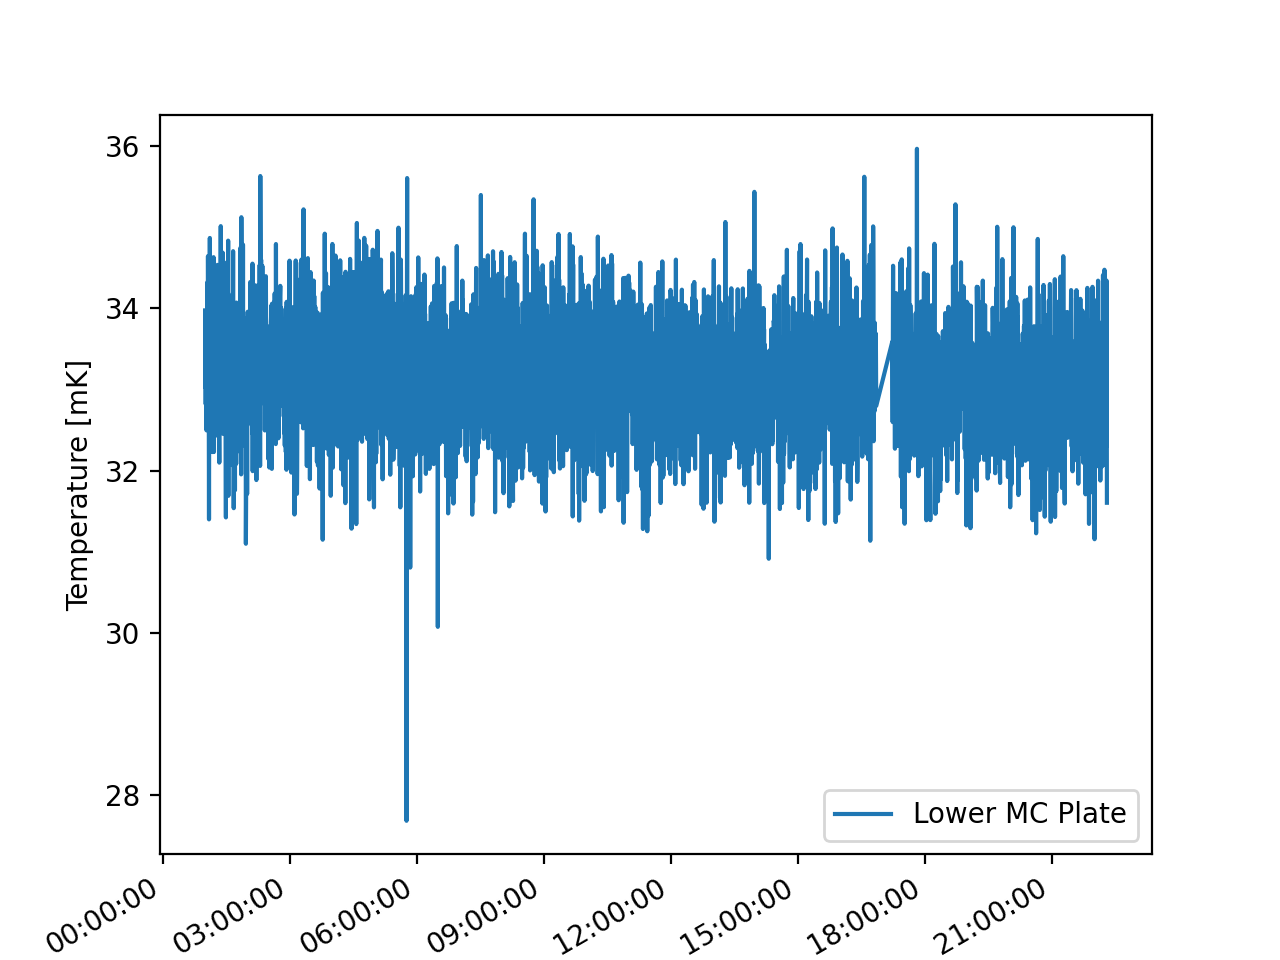

In [14]:
%matplotlib notebook
fig = plt.figure()
plotChannel(4,fig_obj=fig)
# plotChannel(5,fig_obj=fig)
plt.legend(["Lower MC Plate","SQUID Plate"])